![image](https://github.com/user-attachments/assets/09bc4302-ab25-4ec0-971b-5732b28a5ef7)



# Day 5 - 100 Days of Data Science
**[Github Repo](https://github.com/sushant097/100Days__DataScience?tab=readme-ov-file)**

**[Kaggle Notebook](https://www.kaggle.com/code/sushant097/day-5-dry-bean-dataset-analysis/)**

**[Dataset](https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset)**

In [1]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Load Data

In [2]:
data = pd.read_excel("/kaggle/input/dry-bean-dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Data Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

The dataset contains 13,611 entries and 17 columns, which include various geometric and shape-related features of beans, such as:

1. **Area**: Bean area.
2. **Perimeter**: Perimeter of the bean.
3. **MajorAxisLength**: Length of the major axis.
4. **MinorAxisLength**: Length of the minor axis.
5. **AspectRation**: Ratio between the major and minor axes.
6. **Eccentricity**: Eccentricity of the bean shape.
7. **ConvexArea**: Convex area.
8. **EquivDiameter**: Equivalent diameter.
9. **Extent**: Ratio of the area of the bean to the bounding box area.
10. **Solidity**: Solidity of the bean shape.
11. **Roundness**: Measure of bean roundness.
12. **Compactness**: Compactness of the shape.
13. **ShapeFactor1-4**: Various shape factors describing the bean.
14. **Class**: Bean class/category (e.g., SEKER).


Every features are numerical values except class. 

In [5]:
# find total number of classes
classes = np.unique(data['Class'].values)
print(len(classes))
print(classes)

7
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


No problem we can encode these into numerical values. Let's do that. 


In [6]:
class_to_int = {
    "BARBUNYA":0,
    "BOMBAY":1, 
    "CALI":2, 
    "DERMASON":3,
    "HOROZ":4, 
    "SEKER":5,
    "SIRA":6
}
int_to_class = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
data["Class"] = data["Class"].apply(lambda x: class_to_int[str(x)])

In [7]:
print(np.unique(data['Class'].values))

[0 1 2 3 4 5 6]


Cool! We sucessfully transformed our data classes categorical to numerical values. 

In [8]:
# we can do reverse as:
data["Class"].apply(lambda x: int_to_class[x])

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

### Lets see if there is any null values

In [9]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Good! No null values.

# Pairplot

<Figure size 640x480 with 0 Axes>

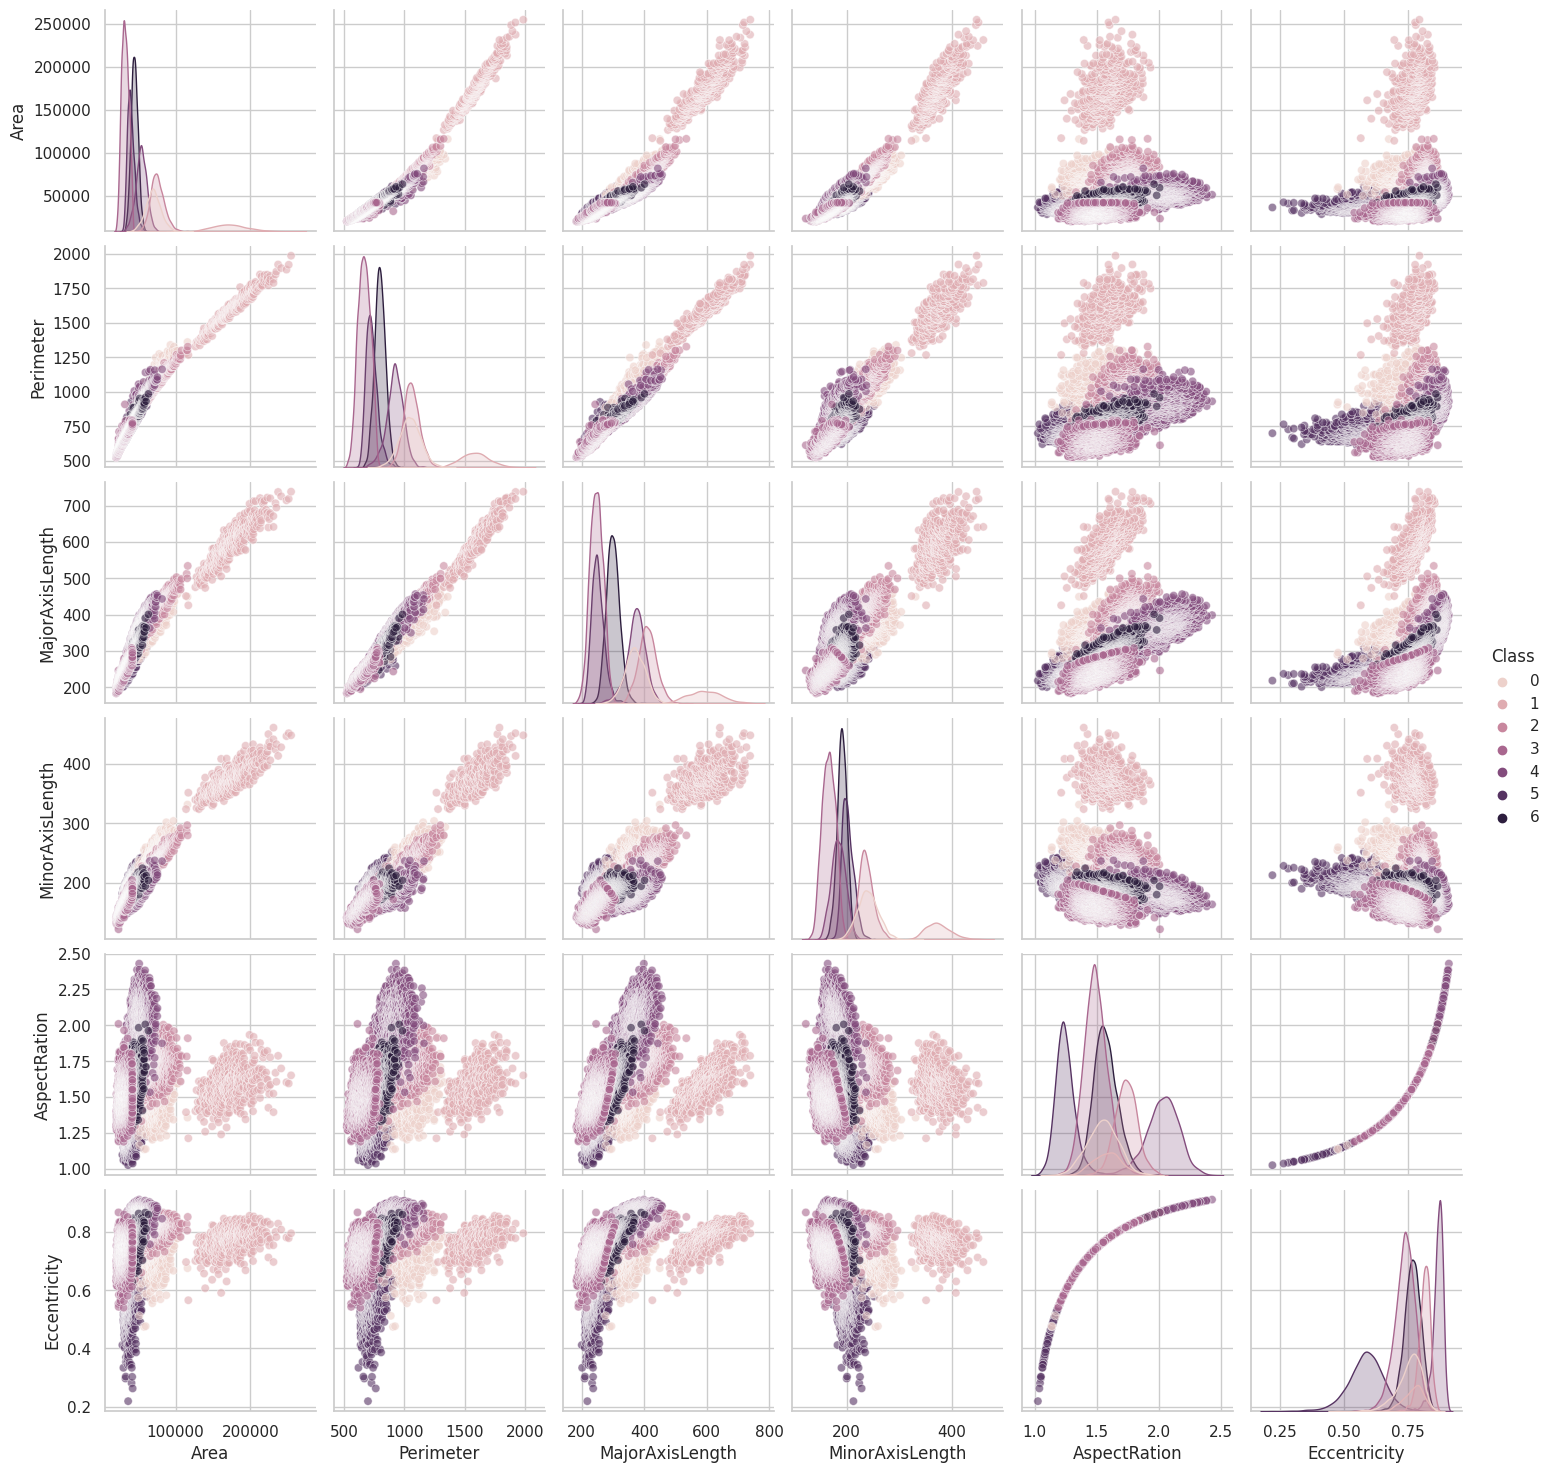

In [10]:
sns.set(style="whitegrid", palette="muted")
# Create a pairplot to visualize relationships between features and the 'Class' column
# This will show the distributions and pairwise relationships in the dataset
# Adjust the plot layout for better readability
plt.suptitle("Pairplot of Dry Bean Dataset", y=1.02)
sns.pairplot(data, 
                         vars=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity'], 
                         hue='Class', 
                         diag_kind="kde", 
                         height=2.5, 
                         plot_kws={'alpha':0.6})



# Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap of Features in Dry Bean Dataset')

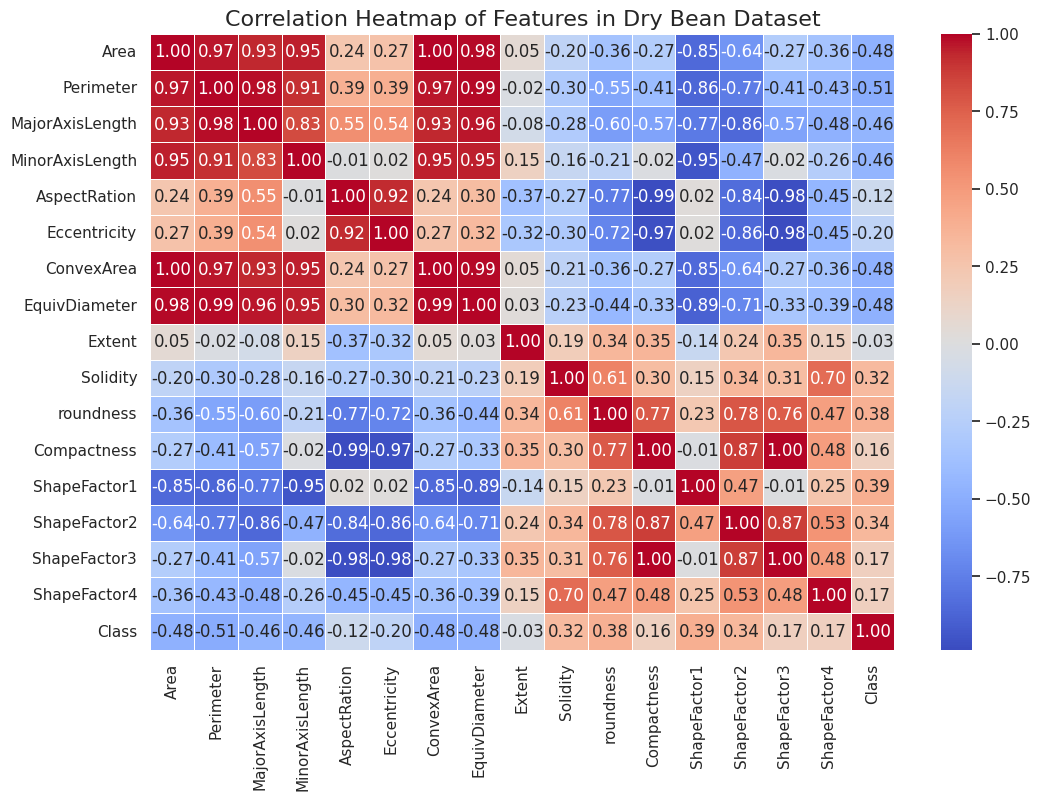

In [11]:
# Compute the correlation matrix for the numerical features
corr_matrix = data.corr()

# set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)

# Add title for the heatmap
plt.title("Correlation Heatmap of Features in Dry Bean Dataset", fontsize=16)


Here is the correlation heatmap of the numerical features in the Dry Bean dataset. The heatmap provides an overview of how each feature correlates with others. Darker shades indicate stronger positive or negative correlations. This can help you identify any highly correlated features that might impact analysis or modeling.

Let's analyze the highly correlated features based on the correlation heatmap. Correlations are measured on a scale from -1 to 1, where:

- **1** indicates a perfect positive correlation (as one feature increases, the other also increases).
- **-1** indicates a perfect negative correlation (as one feature increases, the other decreases).
- **0** indicates no correlation between the features.

The pairs of features that have a high correlation (above 0.8 or below -0.8) and analyze them. Let me start by identifying the strongest correlations in the dataset.

Here are the most highly correlated feature pairs in the dataset, which show correlations greater than 0.8 or less than -0.8. I'll now analyze a few key pairs:

### 1. **Area and ConvexArea** (Correlation: 0.9999)
- These two features are almost perfectly correlated, which means that as the **Area** of the bean increases, the **ConvexArea** (the smallest convex shape that can cover the bean) also increases. This makes sense geometrically since the convex area typically depends on the actual area of the shape.

### 2. **Compactness and ShapeFactor3** (Correlation: 0.9987)
- **Compactness** and **ShapeFactor3** are nearly identical measures of the shape’s compactness, indicating that they are providing very similar information. Shape factors often describe how efficiently a shape fits within its bounding box, and compactness tends to represent how closely a shape resembles a perfect circle.

### 3. **EquivDiameter and Perimeter** (Correlation: 0.9914)
- A strong positive correlation between **EquivDiameter** (equivalent diameter of the bean, assuming a perfect circle) and **Perimeter** suggests that beans with larger equivalent diameters also have larger perimeters. This relationship follows directly from basic geometric principles.

### 4. **AspectRatio and Compactness** (Correlation: -0.9877)
- **AspectRatio** is negatively correlated with **Compactness**, which means that as the bean becomes more elongated (higher aspect ratio), it becomes less compact. This is intuitive, as more elongated shapes will generally be less compact.

### 5. **Eccentricity and ShapeFactor3** (Correlation: -0.9811)
- **Eccentricity** measures how stretched out a shape is, while **ShapeFactor3** measures how close a shape is to a circle. The strong negative correlation shows that beans with high eccentricity (elongated) are less likely to have circular shapes.

### Key Observations:
- Many of the highly correlated features provide redundant information about the shape of the beans, such as **Area**, **ConvexArea**, and **EquivDiameter**.
- Features related to the compactness of the bean, such as **Compactness** and **ShapeFactor3**, are highly correlated, suggesting that some features might be redundant in further analysis or modeling.

If you are building a model, you might want to consider reducing the number of features by removing those that are strongly correlated to avoid multicollinearity. 

# Remove Redundant Features

* We can remove redundant features based on high correlation (above 0.9)
* We'll keep one feature from each highly correlated pair to avoid multicollinearity



In [12]:
# Set a threshold for correlation
corr_threshold = 0.9

# Create a boolean mask to identify highly correlated features
high_corr_mask = (corr_matrix.abs() > corr_threshold) & (corr_matrix != 1.0)

# Track columns to drop
to_drop = set()

# Iterate through the correlation matrix to find features to drop
for col in high_corr_mask.columns:
    # If the column is not already in the list of features to drop
    if col not in to_drop:
        # Get correlated columns
        correlated_cols = high_corr_mask.index[high_corr_mask[col]].tolist()
        # Add correlated columns to drop (skip the current column itself)
        to_drop.update(correlated_cols)
        
# Remove the redundant features from the datframe
data_reduced = data.drop(columns=to_drop)

In [13]:
print("The dropped columns are: ", to_drop)

The dropped columns are:  {'Eccentricity', 'Perimeter', 'ConvexArea', 'Compactness', 'EquivDiameter', 'ShapeFactor3', 'MinorAxisLength', 'MajorAxisLength'}


# Train ML Model: RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


Text(0.5, 1.0, 'Feature Importance based on Random Forest')

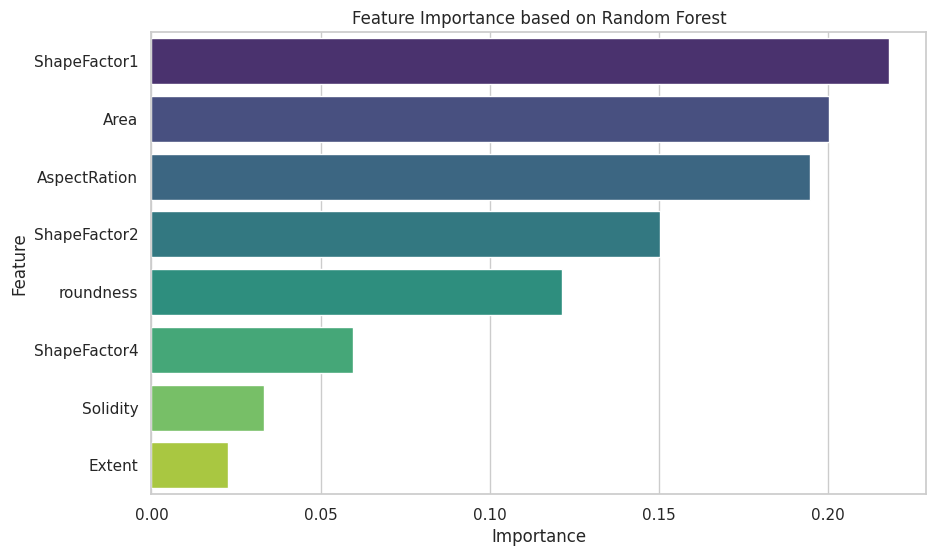

In [15]:
# Prepare the dataset
# Separate features and target
X = data_reduced.drop(columns=["Class"])
y = data_reduced["Class"]

# Encode the target variable (Class)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a dataframe for feature importance
feature_importance_df = pd.DataFrame({
    "Feature":X.columns, 
    "Importance":feature_importance
}).sort_values(by="Importance", ascending=False)

# Show the top features visually
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Feature Importance based on Random Forest')

In [16]:
feature_importance_df.head()

,Feature,Importance
5,ShapeFactor1,0.218135
0,Area,0.200338
1,AspectRation,0.194541
6,ShapeFactor2,0.150220
4,roundness,0.121302


In [17]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
accuracy


0.9260528893241919

The accuracy of the Random Forest model in predicting the bean class is approximately `92.61%`. This indicates that the model performs quite well on the test data.

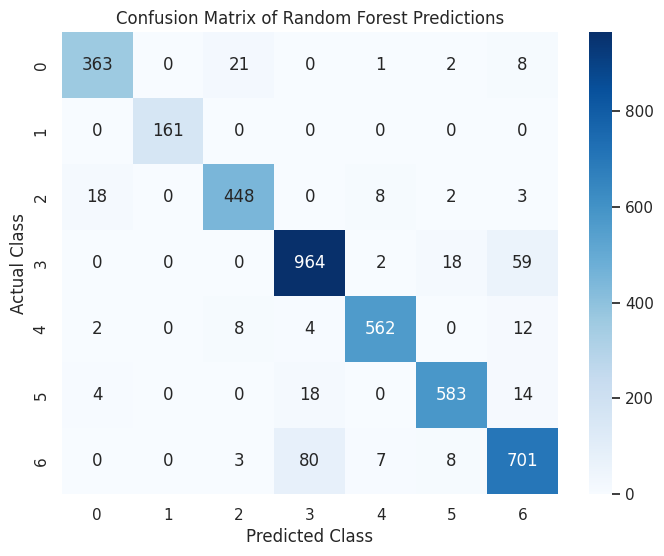

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix of Random Forest Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


Here is the confusion matrix for the Random Forest model's predictions on the test set. It shows the number of correct and incorrect classifications for each bean class, with the diagonal representing correct predictions.



# Improve RandomForestClassifier 

To improve the model's performance, we can try several approaches, such as:

1. Hyperparameter Tuning: Optimize the parameters of the Random Forest model.
2. Feature Engineering: Further refine or create new features.
3. Algorithm Selection: Try different machine learning algorithms.
4. Cross-Validation: Use cross-validation to better estimate model performance.

# Hyperparameter Tuning: Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV


In [20]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_y_pred = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)

# Display the best parameters and the improved accuracy
best_params, best_accuracy

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.8s
[CV] E

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.9258080313418218)

In [21]:
# let's use grid search parameters
# Instantiate the Random Forest classifier with the best parameters from grid search
best_rf_model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
best_y_pred = best_rf_model.predict(X_test)

# Calculate the accuracy of the model
best_accuracy = accuracy_score(y_test, best_y_pred)

# Print the accuracy
print("Improved Accuracy with Optimized Random Forest:", best_accuracy)

Improved Accuracy with Optimized Random Forest: 0.9258080313418218


It's not uncommon for accuracy to remain the same or even decrease slightly after hyperparameter tuning, especially if the dataset is already well-suited for the initial model parameters. However, there are several other strategies you can try to potentially improve the model's performance:

### 1. **Try Cross-Validation**: Use cross-validation to get a more reliable estimate of model performance and avoid overfitting on the train-test split.

```python
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the average cross-validation score
print("Cross-Validation Accuracy:", cv_scores.mean())
```

### 2. **Further Hyperparameter Tuning**: You can experiment with other hyperparameters, such as:
   - `max_features`: Limit the number of features used by each tree.
   - `bootstrap`: Experiment with or without bootstrapping.
   - `criterion`: Try `gini` or `entropy` for the splitting criterion.

### 3. **Feature Engineering**: Explore creating or transforming features that might capture more meaningful patterns in the data. For example, combining features or using dimensionality reduction techniques like PCA.

### 4. **Try Other Models**: Experiment with other models such as:
   - Gradient Boosting
   - XGBoost or LightGBM
   - Support Vector Machines (SVM)

### 5. **Ensemble Methods**: Combine predictions from different models (e.g., Random Forest, Logistic Regression, etc.) using an ensemble approach such as **voting classifiers**.

